# Finding Patterns in Gasoline & Diesel Prices Over The Years
   by Eriberto Contreras
***

# Plan:
- Acquire
- Prepare
- Explore
- Model
- Summarize Conclusions and Recommendations.

***

# Description:
   Over the years the prices of gasoline and diesel have increased and have fluctuated without any clear answers as to why. Just today we have prices ranging from the low 4 dollar range to the high 7 dollar ranges based on the state that one resides in. I will be using some time series analysis to see if we can find key factors from our past which can let us make better planning decicions in the future.

***

# Overview:
- Purpose: To identify paterns in gas prices over time to predict future prices.
- Data: The prices that we will be looking at today are the ideal median price over the USA from the year 1995-2020
- Prices vary state by state, specially because of taxing at a state and local level, for that reason I have decided to stick to median prices over the country.

- Gasoline: 
    year: 1956 = 1.12 dollars a gallon. 
    year: 2020 = 2.33 dollars a gallon.
- Diesel:
    year: 1956 = 1.10 dollars a gallon.
    year: 2020 = 2.63 dollars a gallon.

Data was collected in the following links:
- [Gasoline & Diesel prices](https://www.kaggle.com/datasets/mruanova/us-gasoline-and-diesel-retail-prices-19952021)
- [State minimum wage](https://www.kaggle.com/datasets/lislejoem/us-minimum-wage-by-state-from-1968-to-2017)
- [Federal minimum wage](https://www.kaggle.com/datasets/brandonconrady/us-minimum-wage-1938-2020)

***

# Objectives:
- Perform a Time Series Analysis on the Gasoline and Diesel prices.
- Notate and mark down the takeaways from the vizual data.
- Find key patterns that we can used for future predictions.
- Give recomendations that can benefit both consumers and companies that heavily rely on fuel for their energy and travel needs.
- Make all steps reproducable so that future data science teams can conclude equal results.
***

# Project Summary:
During the process of acquiring fuel, federal wage, and state minimum wage data, I realize that for this specific time series analysis we would only require the prices of gasoline & Diesel prices over the last couple of years. The existing data frame that resulted from acquiring the data can be successfully used for future data science experiments and other types of modeling.

Throuhgout the exploration and visualization process I realize that extreme economic events like the 2008 economic crash played huge factors in gas price drops. 

In conclusion, because of extreme factors like this I was not successful in making a good predictive model.

My recommendations for the future would be to collect more data over the next comming years, wait to see if results of the current inflation in our economic state returns a similar result as the last and build a better predictive figure and model.
***
### Imports necessary to run code -

In [1]:
# coding imports
import math
from math import sqrt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import scipy.stats
import scipy
import os

# needed for modeling
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20
from statsmodels.tsa.api import Holt
import acquire
import prepare

***

# Acquire

In [2]:
#importing unprepared data
df = acquire.all_gas_data()

In [3]:
df

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,...,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73273,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.120,2.022,2.329,2.540,2.379,2.778,2.792,2.661,2.947,2.502
73274,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.156,2.063,2.355,2.567,2.412,2.798,2.820,2.694,2.968,2.526
73275,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.158,2.063,2.361,2.565,2.407,2.800,2.821,2.693,2.973,2.559
73276,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.224,2.137,2.410,2.618,2.466,2.843,2.871,2.749,3.015,2.619


- Takeaways:
    - 73278 rows
    - 43 collumns
    - Has a year column but no date

***
# Prepare

The prepare data process:
   - 'A1' column was renamed to 'gasoline' to give it better representation.
   - 'D1' columnn was renamed to 'diesel' to give it better representation.
   - All other collumns were dropped since we will only be focusing on Gasoline and Diesel prices for this time series model.

In [4]:
#preparing data
df = prepare.prep_gas_data(df)
# dropping month column
df = df.drop(columns=['month'])
df

,gasoline,diesel
Date,,
1995-01-02,1.127,1.104
1995-01-09,1.134,1.102
1995-01-16,1.126,1.100
1995-01-23,1.132,1.095
1995-01-30,1.131,1.090
...,...,...
2020-11-30,2.211,2.502
2020-12-07,2.246,2.526
2020-12-14,2.247,2.559


- Takeaways:
    - dates range from jan, 1995 - dec, 2020
    - 2 columns left are 'gasoline' and 'diesel'
    - 73278 rows
***

# Explore

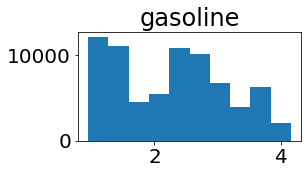

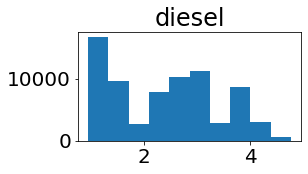

In [5]:
for col in df.columns:
    #graph size
    plt.figure(figsize=(4,2))
    #histogram graph
    plt.hist(df[col])
    #title of column
    plt.title(col)
    # show graph
    plt.show()